### <font size=5 > <p style="color:red"> Comparative analysis of various regressors for predicting medical charges.

### So far
In the previous approach we have done a good EDA, so in this approach we will only focus on MLs.

we have learnt that 'smoker','age' and 'bmi' have highest correlation with charges.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Covert object data type into categories.

In [95]:
df2 = df[['sex', 'smoker', 'region']].astype('category')
df2

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


### Make a separate data frame for numeric data types.

In [96]:
df3=df[['age', 'bmi', 'children', 'charges']]
df3

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


### Now join both the data frames

In [97]:
df_new = pd.concat([df2, df3], axis=1, join='inner')
display(df_new)

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19,27.900,0,16884.92400
1,male,no,southeast,18,33.770,1,1725.55230
2,male,no,southeast,28,33.000,3,4449.46200
3,male,no,northwest,33,22.705,0,21984.47061
4,male,no,northwest,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...
1333,male,no,northwest,50,30.970,3,10600.54830
1334,female,no,northeast,18,31.920,0,2205.98080
1335,female,no,southeast,18,36.850,0,1629.83350
1336,female,no,southwest,21,25.800,0,2007.94500


In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       1338 non-null   category
 1   smoker    1338 non-null   category
 2   region    1338 non-null   category
 3   age       1338 non-null   int64   
 4   bmi       1338 non-null   float64 
 5   children  1338 non-null   int64   
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Now convert categories into numerical 

In [99]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df_new.sex.drop_duplicates())
df_new.sex = label.transform(df_new.sex)
label.fit(df_new.smoker.drop_duplicates())
df_new.smoker = label.transform(df_new.smoker)
label.fit(df_new.region.drop_duplicates())
df_new.region = label.transform(df_new.region)
df_new.dtypes

sex           int32
smoker        int32
region        int32
age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [100]:
df_new

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...
1333,1,0,1,50,30.970,3,10600.54830
1334,0,0,0,18,31.920,0,2205.98080
1335,0,0,2,18,36.850,0,1629.83350
1336,0,0,3,21,25.800,0,2007.94500


> ### Have you noticed any problem?
Do you know, '4' is assigned to which region. For that you will have to look up in df table. 

### Let's see correlations among different attributes with a heat map

<AxesSubplot:>

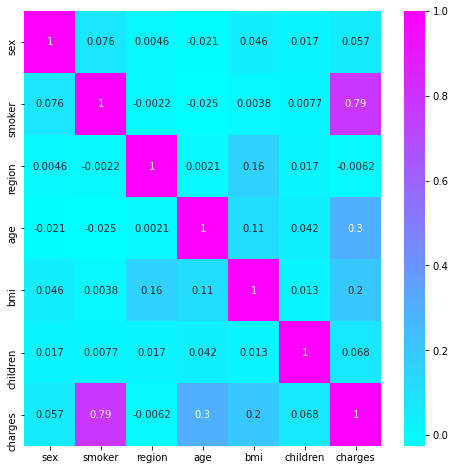

In [101]:
plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='cool')

# Multiple Linear Regression

In [102]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df_new.drop(['charges'], axis = 1)
y = df_new['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
mlr = LinearRegression()
mlr.fit(x_train, y_train)
print("Intercept:",mlr.intercept_,'\n')
print("Co-efficients:",mlr.coef_, '\n')
print("Score:",mlr.score(x_test, y_test), '\n')
y_pred = mlr.predict(x_test)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

Intercept: -11661.98390882461 

Co-efficients: [  -24.32455098 23568.87948381  -288.50857254   253.99185244
   328.40261701   443.72929547] 

Score: 0.799874714544996 

RMSE: 5643.2197488809015


# Ridge Regression

In [103]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print("Intercept:",Ridge.intercept_, "\n")
print("Co-efficient:",Ridge.coef_, "\n")
print("Score:",Ridge.score(x_test, y_test), "\n")
from sklearn.metrics import mean_squared_error
y_pred = Ridge.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

Intercept: -11643.440927495825 

Co-efficient: [-2.15112284e+01  2.35009674e+04 -2.89027871e+02  2.53893751e+02
  3.28339566e+02  4.44238477e+02] 

Score: 0.799698963206314 

RMSE: 5645.697161384231


# Lasso Regression

In [104]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print("Intercept:",Lasso.intercept_, "\n")
print("Co-efficient:",Lasso.coef_, "\n")
print("Score:",Lasso.score(x_test, y_test), "\n")
from sklearn.metrics import mean_squared_error
y_pred = Lasso.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)

Intercept: -11661.834695459673 

Co-efficient: [-2.34635046e+01  2.35676183e+04 -2.88339435e+02  2.53991252e+02
  3.28389549e+02  4.43587822e+02] 

Score: 0.7998690342198963 

RMSE: 5643.299836450169


# Polynomial Regressor

In [130]:
from sklearn.preprocessing import PolynomialFeatures
x = df_new.drop(['charges', 'sex', 'region'], axis = 1)
y = df_new.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print("Intercept:",Pol_reg.intercept_ ,'\n')
print("Coefficients:",Pol_reg.coef_, '\n')
print("Score",Pol_reg.score(x_test, y_test))

Intercept: -5325.881705253838 

Coefficients: [ 0.00000000e+00 -9.52698471e+03 -4.01606591e+01  5.23702019e+02
  8.52025026e+02 -9.52698471e+03  4.20849790e+00  1.40840670e+03
 -4.46151855e+02  3.04430186e+00  1.84508369e+00  6.01720286e+00
 -9.38983382e+00  3.81612289e+00 -1.45982790e+02] 

Score 0.8812595703345202


#### Nice, we have got the best score so far.

In [116]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477448
Mean Squared Error: 18895160.098780815
Root Mean Squared Error: 4346.856346692494


#### Root Mean Squared Error for Polynomial Regression is also lowest amont all the algorithms

In [117]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


# Conclusions
> ### 1. For this prediction 'smoker', 'age', 'bmi' are the highest importance attributes.
> ### 2. Polynomial regression turns out to be thebest regression in this case.